# Remember to comment code

In [11]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
data = pd.read_csv('../Data/Data Cleaning and Feature Eng/SL-recent-grads.csv')
data.head()

,Unnamed: 0,Median,Median_category,Major_code,Major_category,Percent_low_wage,Percent_college,Percent_non_college,Num_majors,ShareWomen,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0,110000,110-120K,2419,Engineering,0.082514,0.655836,0.155622,29.0,0.120564,...,0,1,0,0,0,0,0,0,0,0
1,1,75000,70-80K,2416,Engineering,0.066138,0.462963,0.339947,29.0,0.101852,...,0,1,0,0,0,0,0,0,0,0
2,2,73000,70-80K,2415,Engineering,0.000000,0.532710,0.205607,29.0,0.153037,...,0,1,0,0,0,0,0,0,0,0
3,3,70000,70-80K,2417,Engineering,0.000000,0.420509,0.081081,29.0,0.107313,...,0,1,0,0,0,0,0,0,0,0
4,4,65000,60-70K,2405,Engineering,0.030130,0.567700,0.137632,29.0,0.341631,...,0,1,0,0,0,0,0,0,0,0


In [26]:
data.describe()

,Unnamed: 0,Median,Major_code,Percent_low_wage,Percent_college,Percent_non_college,Num_majors,ShareWomen,Women,Part_time,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000
mean,86.075581,40152.325581,3880.273256,0.090409,0.354063,0.329541,14.313953,0.523090,22653.656977,8883.750000,...,0.093023,0.168605,0.069767,0.087209,0.034884,0.005814,0.029070,0.05814,0.052326,0.052326
std,50.221266,11503.665592,1692.670105,0.050158,0.163069,0.131646,7.284144,0.231135,41053.785020,14675.322609,...,0.291313,0.375496,0.255498,0.282965,0.184021,0.076249,0.168493,0.23469,0.223333,0.223333
min,0.000000,22000.000000,1100.000000,0.000000,0.053268,0.069444,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,42.750000,33000.000000,2402.750000,0.054855,0.240113,0.220708,10.000000,0.336026,1851.500000,1037.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,86.500000,36000.000000,3607.500000,0.086846,0.322580,0.328128,13.000000,0.539560,8386.500000,3332.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,129.250000,45000.000000,5503.250000,0.118060,0.464246,0.427492,16.000000,0.703299,22553.750000,9981.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,172.000000,110000.000000,6403.000000,0.300951,0.751493,0.702569,29.000000,0.968954,307087.000000,115172.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [27]:
train, test = train_test_split(data,test_size=0.15)

Add data histograms here

In [28]:
c = DecisionTreeClassifier(min_samples_split=100)

In [29]:
features = [
            'Major_code',
 'Percent_low_wage',
 'Percent_college',
 'Percent_non_college',
 'Num_majors',
 'ShareWomen',
 'Women',
 'Part_time',
 'Unemployment_rate',
 'P25th',
 'P75th',
 'Percent_sample_size',
 'Major_category_Agriculture & Natural Resources',
 'Major_category_Arts',
 'Major_category_Biology & Life Science',
 'Major_category_Business',
 'Major_category_Communications & Journalism',
 'Major_category_Computers & Mathematics',
 'Major_category_Education',
 'Major_category_Engineering',
 'Major_category_Health',
 'Major_category_Humanities & Liberal Arts',
 'Major_category_Industrial Arts & Consumer Services',
 'Major_category_Interdisciplinary',
 'Major_category_Law & Public Policy',
 'Major_category_Physical Sciences',
 'Major_category_Psychology & Social Work',
 'Major_category_Social Science']

In [30]:
X_train = train[features]
y_train = train['Median_category']

X_test = test[features]
y_test = test['Median_category']

In [31]:
c.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100)

In [32]:
import imageio,io
import pydotplus

In [33]:
def show_tree(tree,features,path):
  f = io.StringIO()
  export_graphviz(tree,out_file=f,feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imageio.imread(path)
  plt.rcParams['figure.figsize'] = (20,20)
  plt.imshow(img)

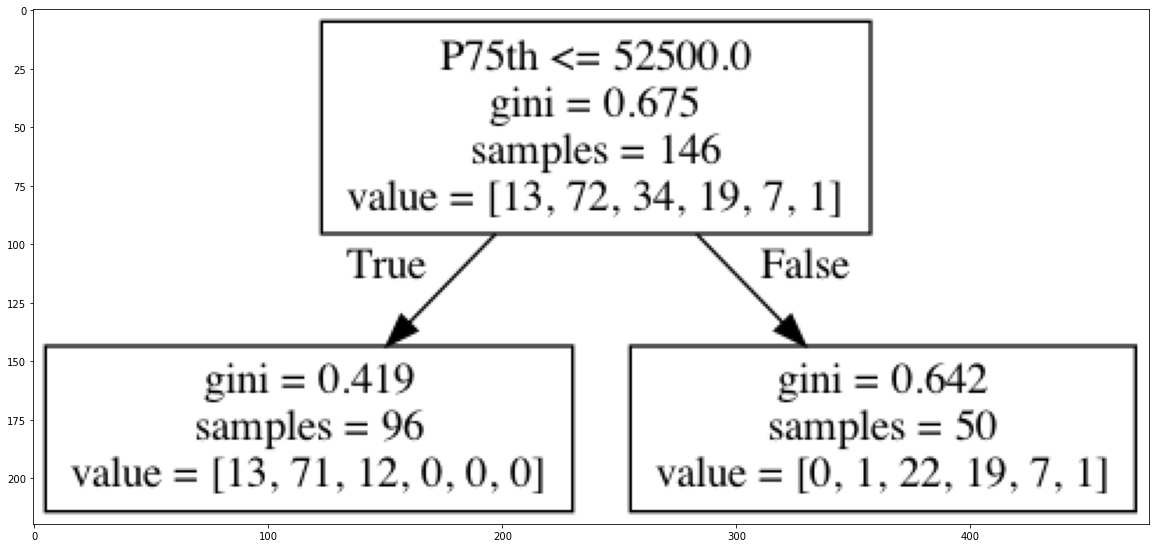

In [34]:
show_tree(c,features,'decision_tree')

In [35]:
y_pred = c.predict(X_test)

In [36]:
score = accuracy_score(y_test,y_pred)*100

In [37]:
print("Accuracy using Decision Tree: ",score )

Accuracy using Decision Tree:  53.84615384615385
